In [1]:
import torch
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from src.components.Net import Net
from src.components.CustomImageDataset import CustomImageDataset

In [2]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Resize the images to (224, 224)
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

In [3]:
batch_size = 1

test_dataset = CustomImageDataset("./labels/test_labels.csv", "./src/ref_imgs/test_imgs/", transform=transform)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    # transformToPIL(img).show()
    plt.imshow(np.transpose(np.array(img), (1, 2, 0)))
    plt.show()

In [5]:
classes = ('apple', 'banana', 'orange')

In [6]:
net = Net()

In [7]:
net.load_state_dict(torch.load("./fruit_identification_model.pth"))

<All keys matched successfully>

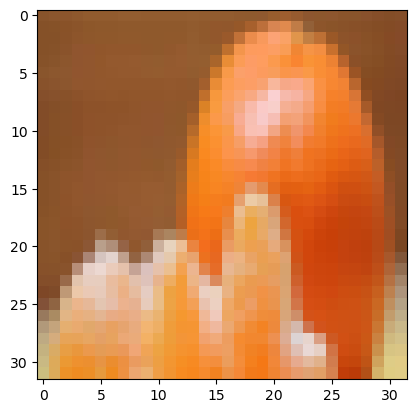

GroundTruth:  orange
torch.Size([32])
Prediction:  orange
Success?:  True


In [8]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

net.eval()

outputs = net(images)

print(images[0][0][0].shape)

_, predictions = torch.max(outputs.data, 1)

print('Prediction: ', ' '.join(f'{classes[predictions[j]]:5s}' for j in range(batch_size)))
print("Success?: ", ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)) ==''.join('%5s' % classes[predictions[j]] for j in range(batch_size)))

# # print images
# imshow(torch)

In [9]:
net.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        print(list(labels[i]) for i in range (len(labels)))
        print(list(predicted[i]) for i in range (len(predicted)))

print(f'Accuracy of the network on the {len(test_dataset)} test images: {100 * correct / total:.2f}%')

<generator object <genexpr> at 0x00000296EC301380>
<generator object <genexpr> at 0x00000296EC301380>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 0x00000296EC3014D0>
<generator object <genexpr> at 